In [1]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

### Grab all 12 datasets 


In [4]:
misalignment_0 = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")
misalignment_8 = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/8 deg/*.csv")
misalignment_20 = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/20 deg/*.csv")

reapplication_1 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/first test/*.csv")
reapplication_2 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")
reapplication_3 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/third test/*.csv")
reapplication_4 = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/fourth test/*.csv")

length_1 = os.path.join(path_to_repository , "CSV Data/12_9_2024/first/*.csv")
length_2 = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")
length_3 = os.path.join(path_to_repository , "CSV Data/12_9_2024/third/*.csv")
length_4 = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p3/*.csv")
length_5 = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv")

DS_all = [misalignment_0, misalignment_8, misalignment_20, reapplication_1, reapplication_2, reapplication_3, reapplication_4, length_1, length_2, length_3, length_4, length_5]



### Preeya method for obtainng accuracy plot from plot_accuracy

Use one data set (datafiles) for model from DS_all list.  For testing, shuffle the "datafiles" "niter" times and determine accuracy for each angle.  There will be "niter" accuracies and std for each angle. This is how the accuracy plot is produced. 

For Tom method, shuffle attribute was not set but instead the 80% train/20% split was iterated 100 times. I seemed to have gotten larger error bars.  

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized with initial value R₀: -103.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized with initial value R₀: -101.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized with initial value R₀: -103.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized with initial value R₀: -104.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.

C:\Users\toppenheim\Desktop\UCSF\Preeya UCB\Strain-Sensor-\Strain-Sensor-\Code\analysis\analysis.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots()


['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized with initial value R₀: -117.0


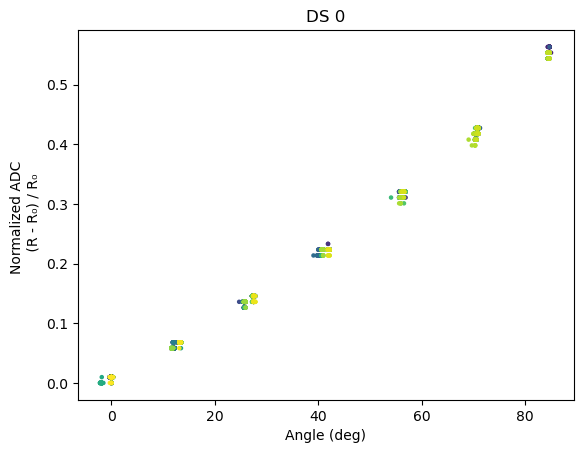

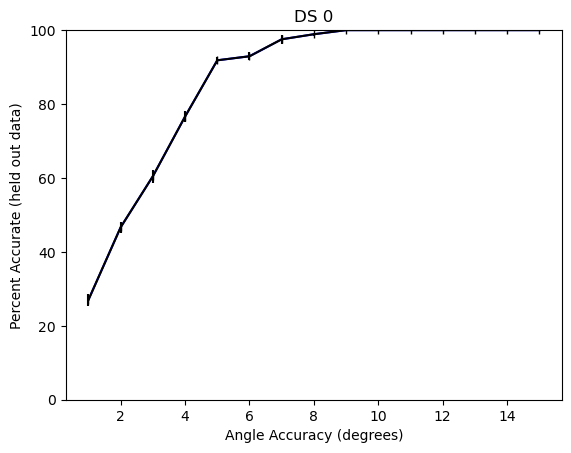

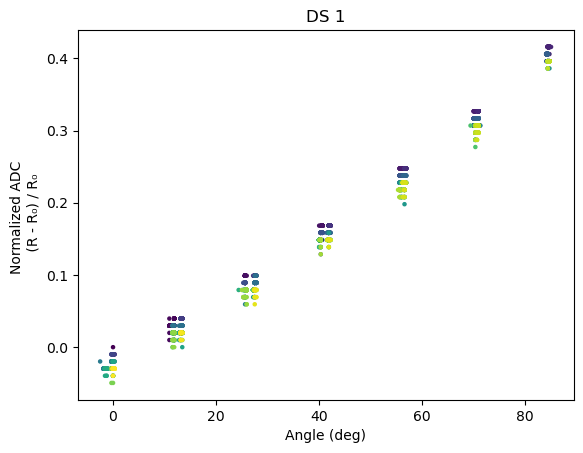

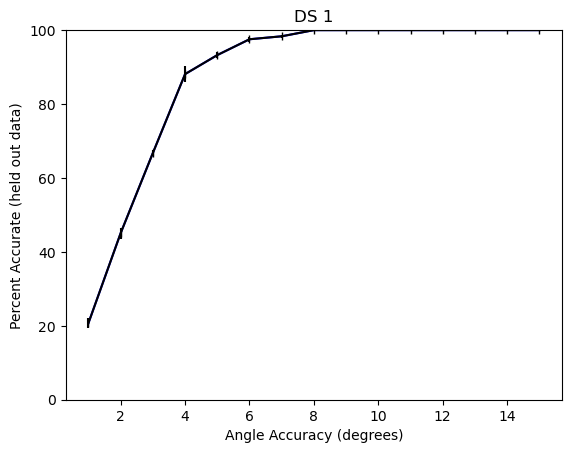

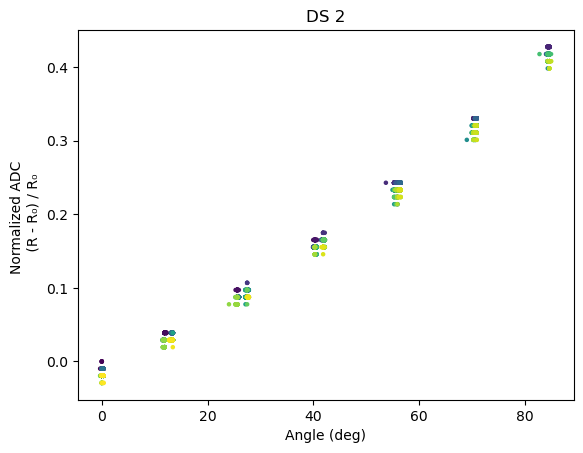

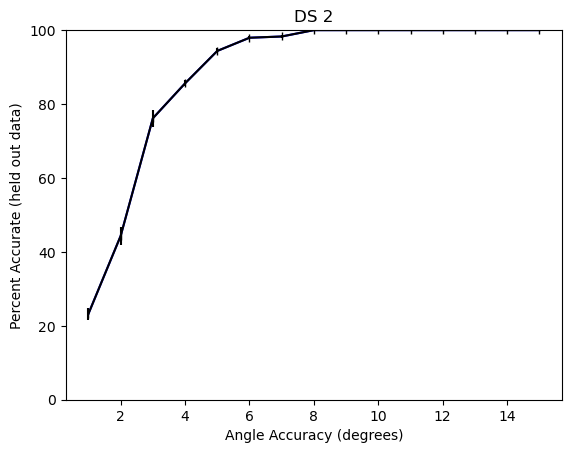

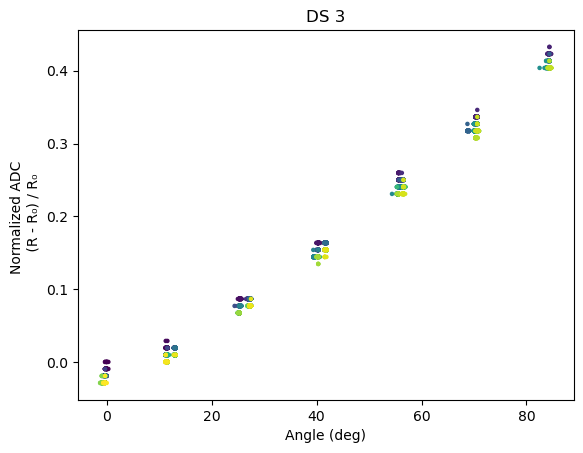

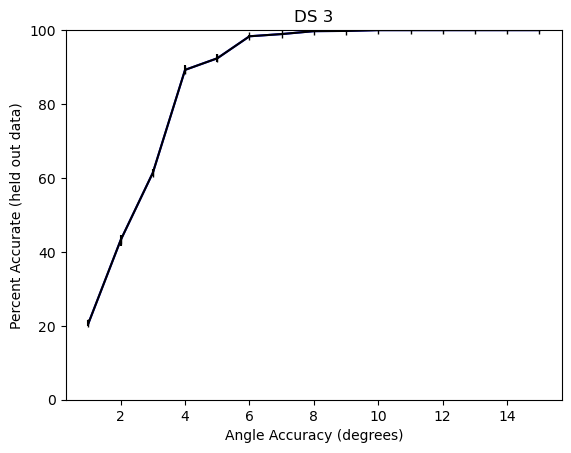

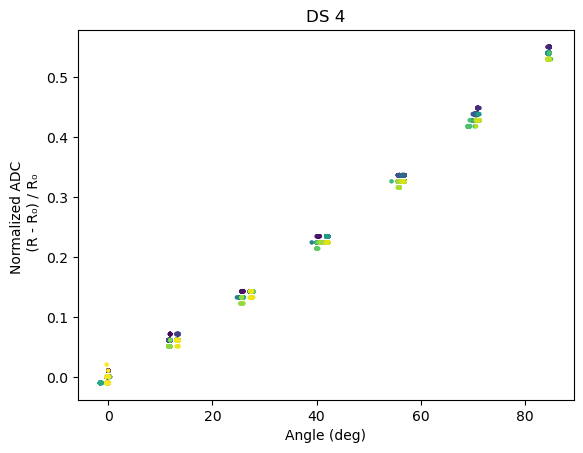

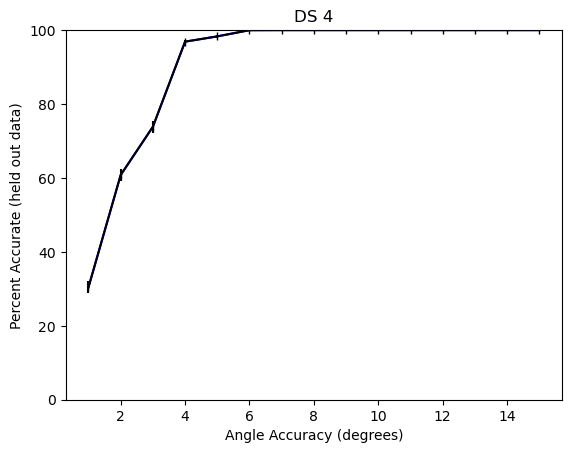

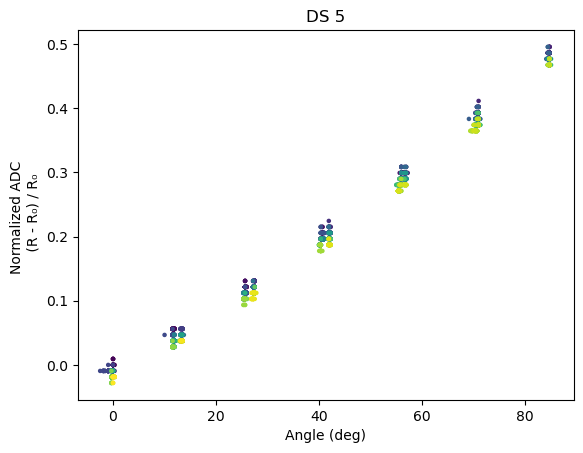

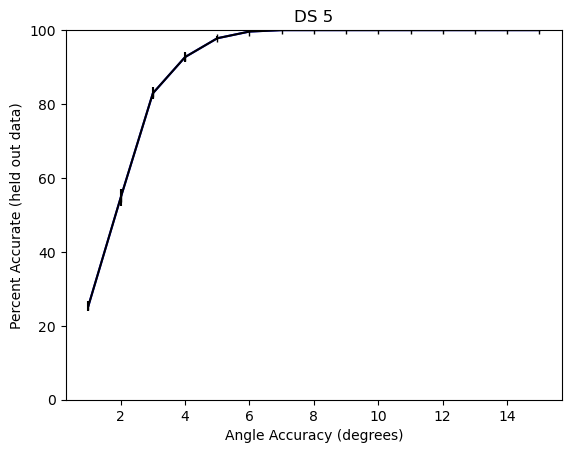

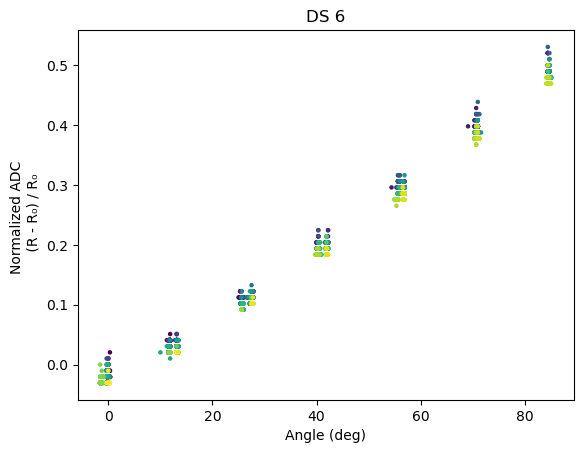

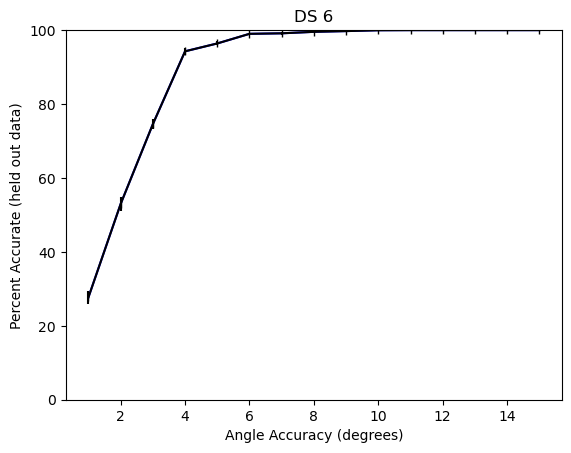

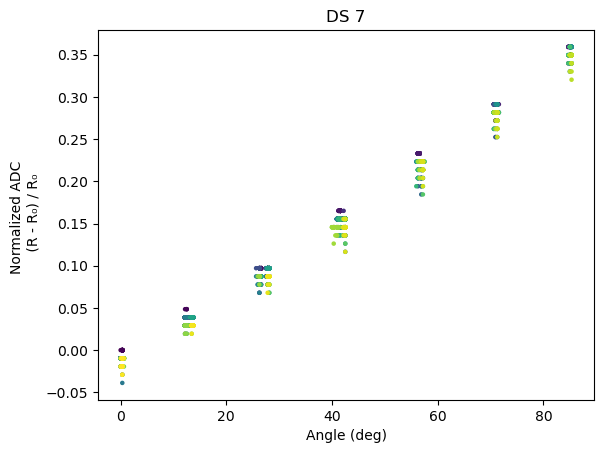

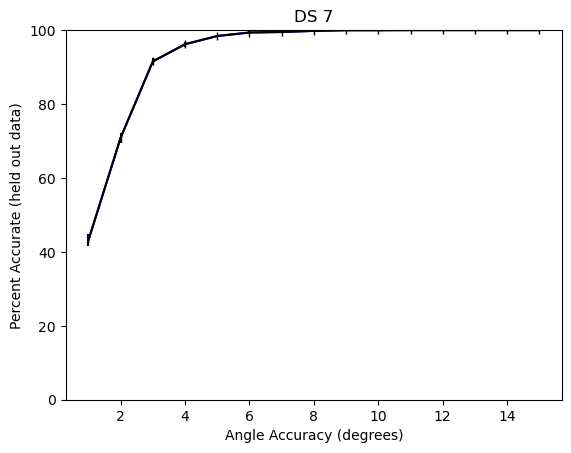

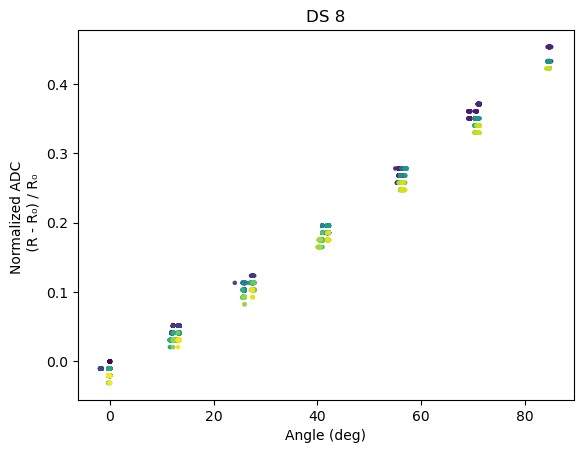

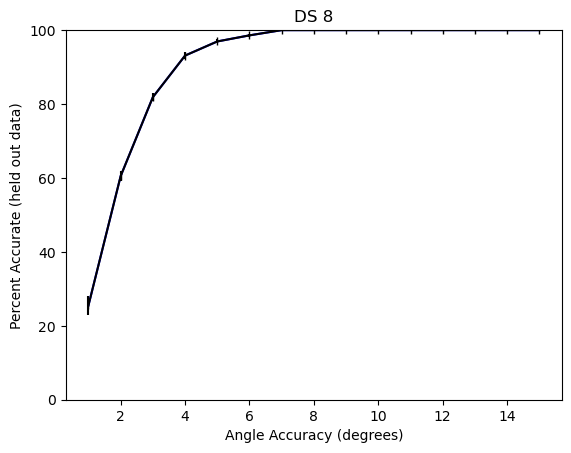

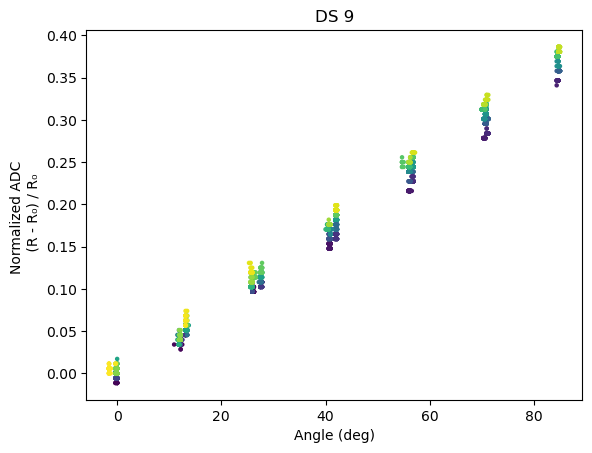

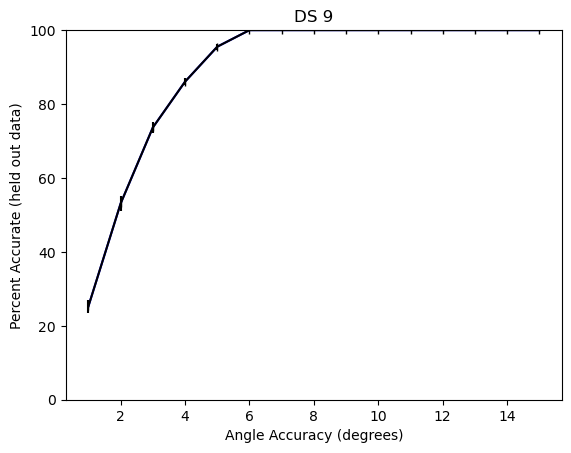

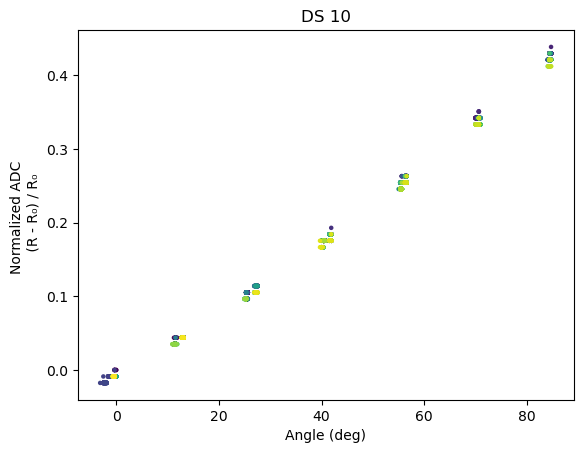

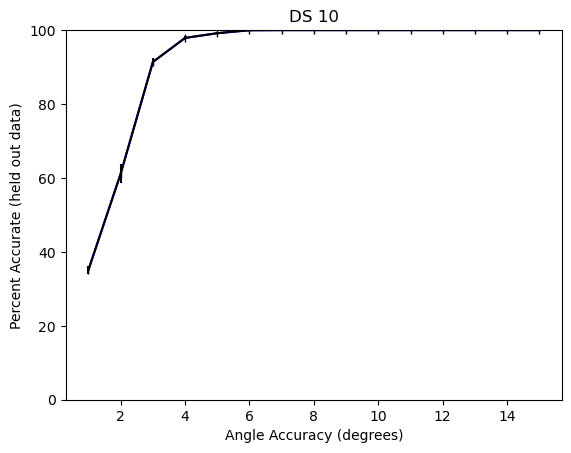

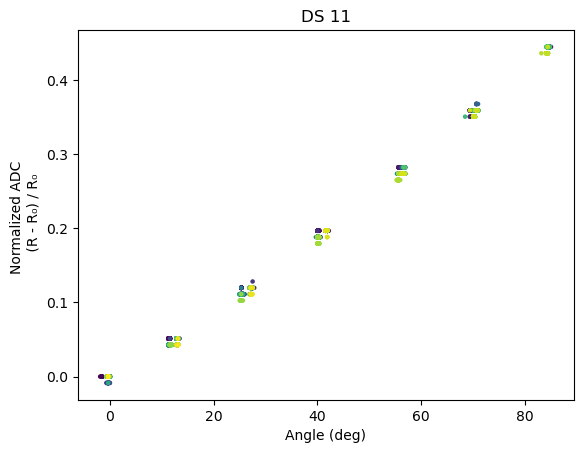

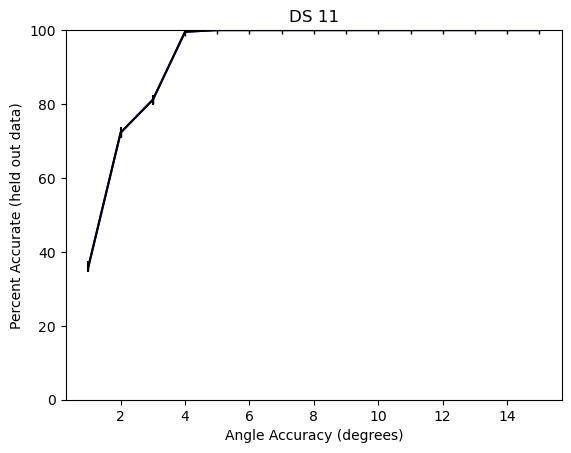

In [5]:
# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.plot_data(scatter=True, title='DS %d'%i_d)

    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

### Combining accuracy data from all data and plotting single accuracy plot with error bars

Using normalize_adc_bw_01():: Now fit model on dataset 1 and test on dataset 2 and 3 etc. 
Append accuracy from those plots (accuracy obtained from model from data set "one" applied to all other datasets) to a list.    The final plot is taking the average of those accuracy data and 1xstd for error bars.

Preeya Method:  Use one dataset for training and evaluate accuracy on all other datasets. The accuracy determined from all other datasets is plotted in figures title "train DS x, test on others".  Those accuracies are stored in list. That list is averaged over for each angle as well as calc of std.  This is how the final plot is produced.

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  -103.0 ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -96.0 ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -100.0 ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\

ADC normalized bw 0-1. ADC max:  -174.0 ADC min:  -244.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -112.0 ADC min:  -164.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -116.0 ADC min:  -169.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  -97.0 ADC min:  -152.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  -103.0 ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/St

ADC normalized bw 0-1. ADC max:  -104.0 ADC min:  -160.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/fourth test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_4.csv']
ADC normalized bw 0-1. ADC max:  -95.0 ADC min:  -150.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  -94.0 ADC min:  -141.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/third\\Bending_data_abs_1p86_s3_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  -174.0 ADC min:  -244.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -112.0 ADC min:  -164.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/

C:\Users\toppenheim\Desktop\UCSF\Preeya UCB\Strain-Sensor-\Strain-Sensor-\Code\analysis\analysis.py:325: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots()


ADC normalized bw 0-1. ADC max:  -100.0 ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  -101.0 ADC min:  -149.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  -97.0 ADC min:  -152.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/third test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_3.csv']
ADC normalized bw 0-1. ADC max:  -104.0 ADC min:  -160.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/fourth test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_4.csv']
ADC normalized bw 0-1. ADC max:  -95.0 ADC min:  -150.0
['C:/Users/toppenheim/D

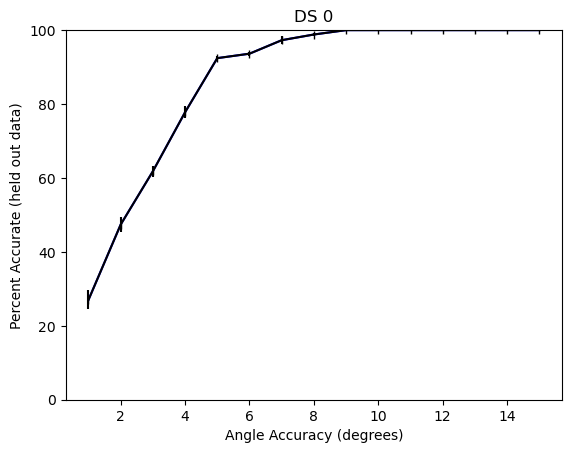

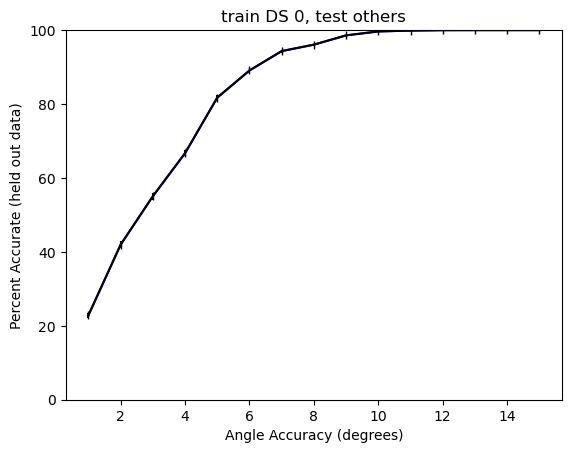

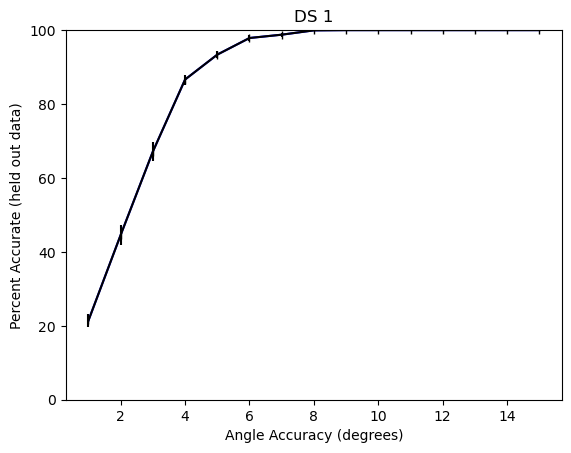

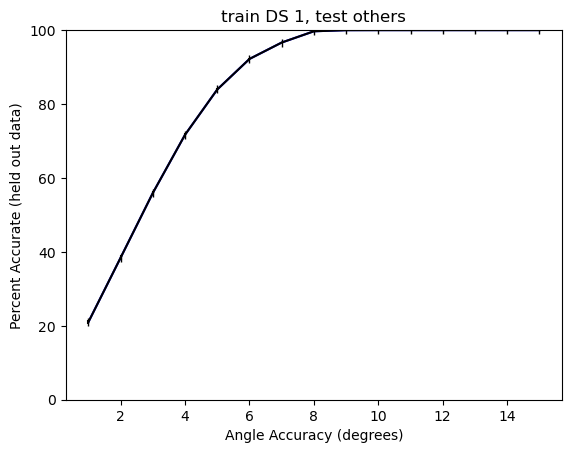

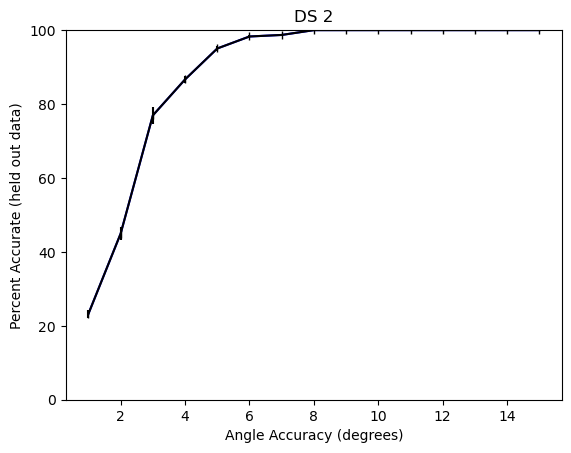

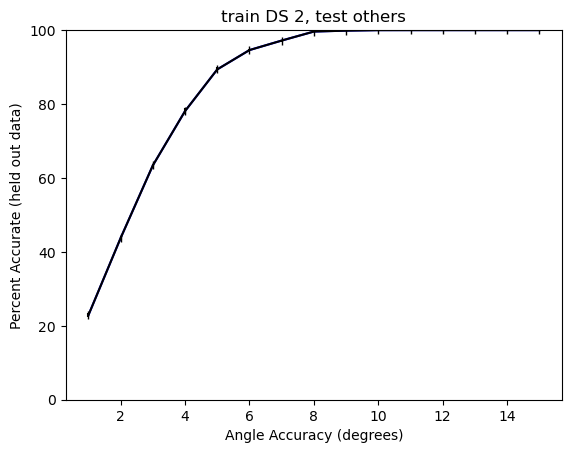

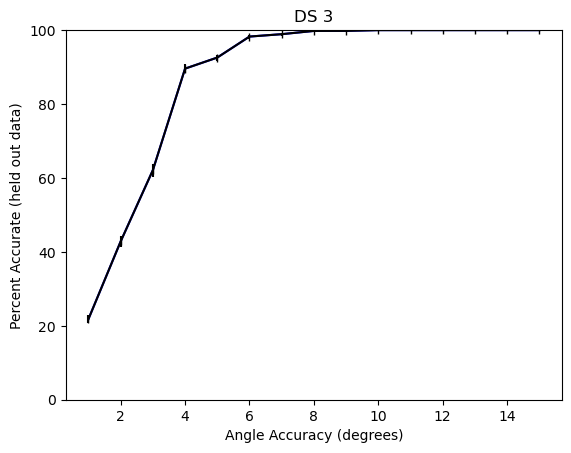

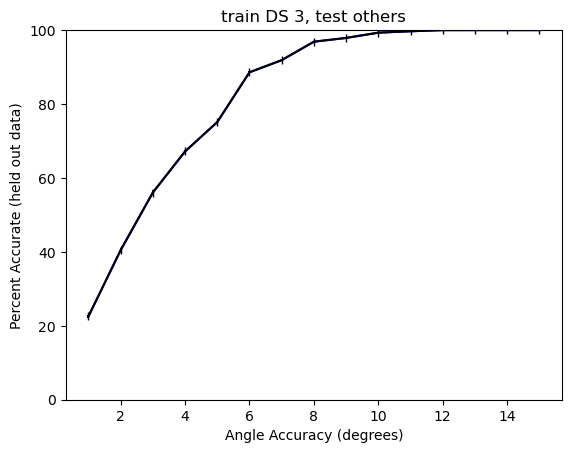

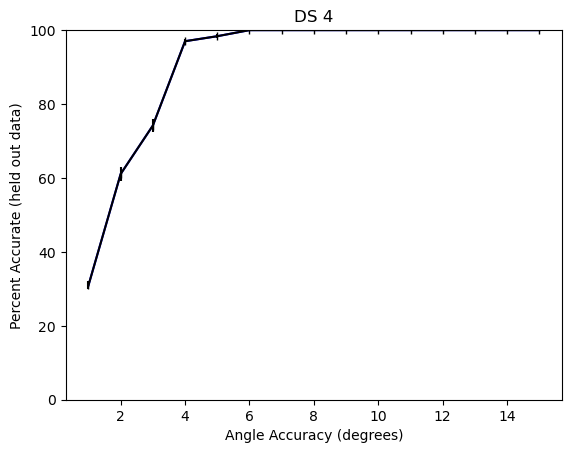

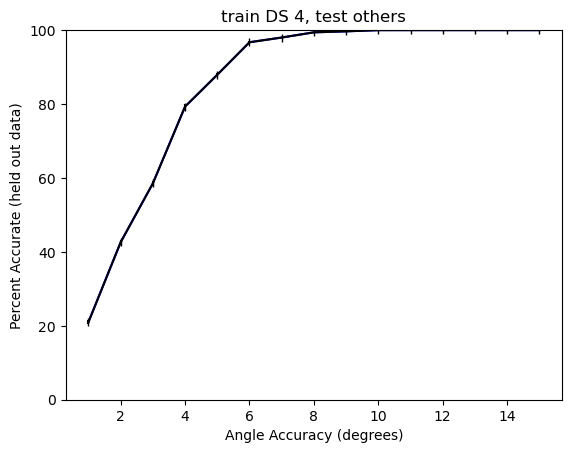

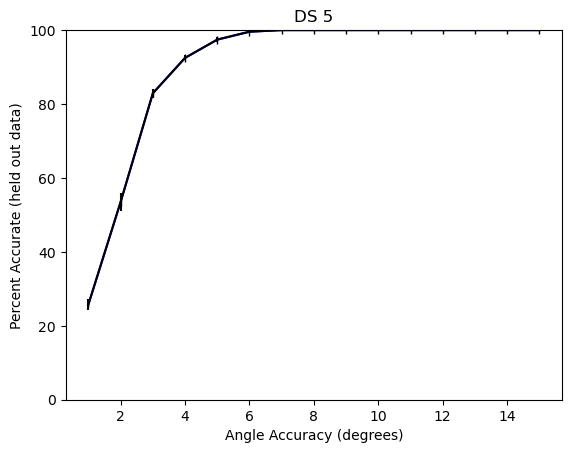

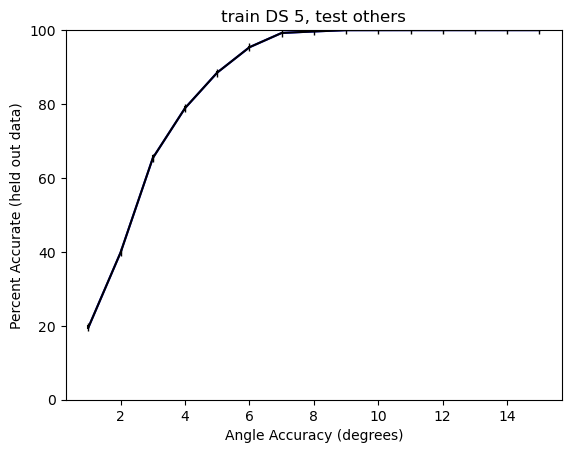

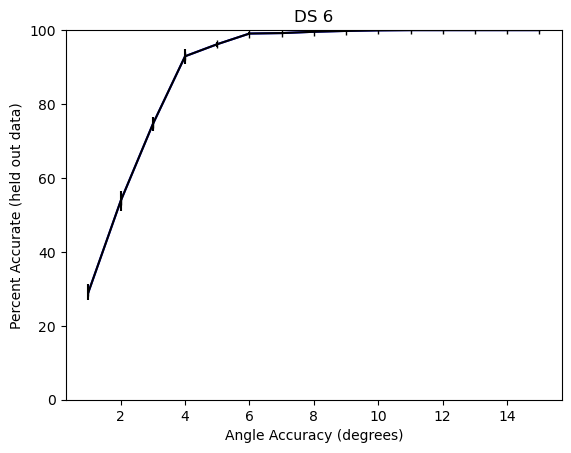

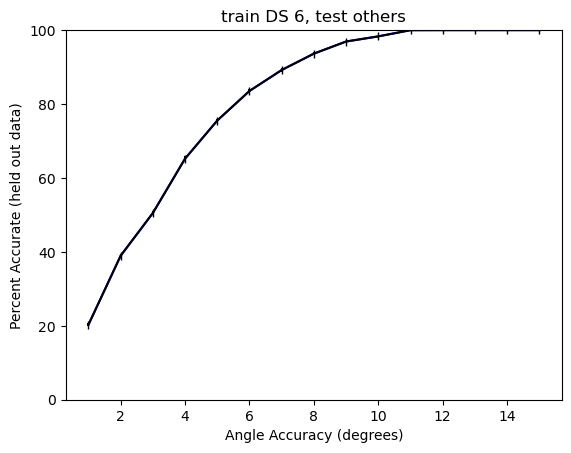

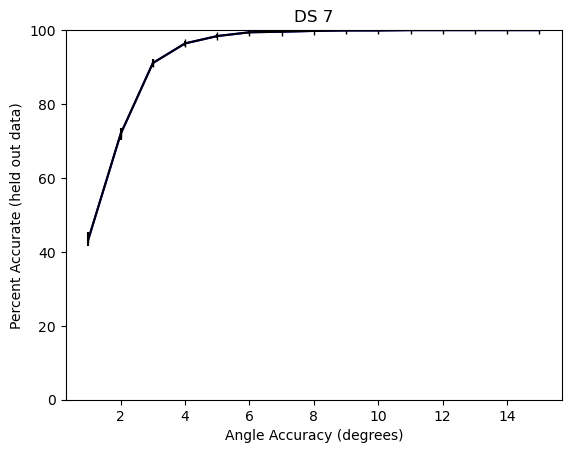

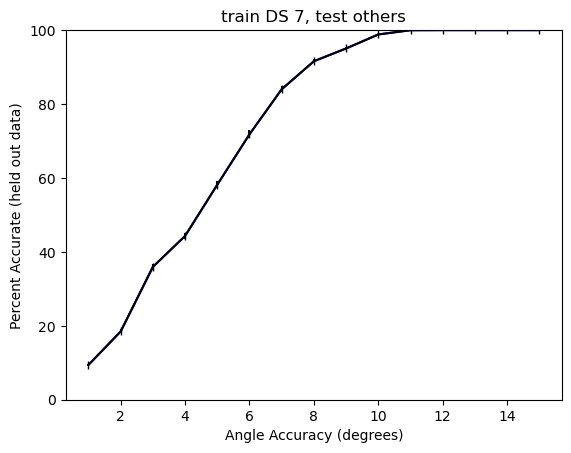

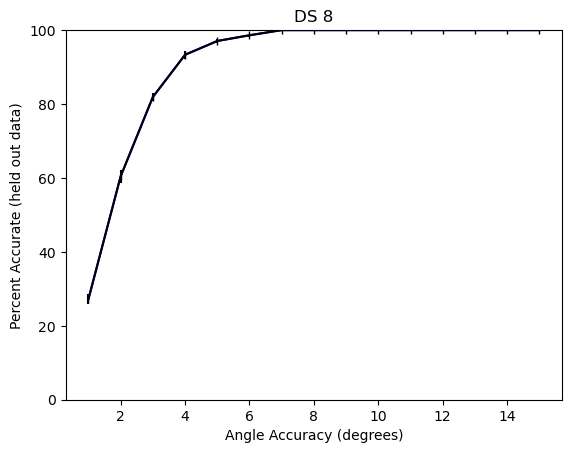

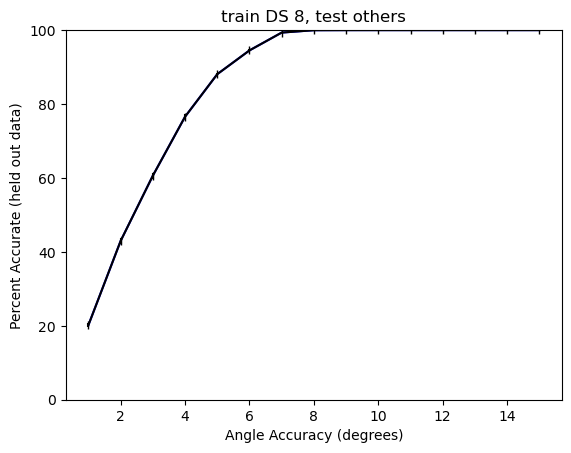

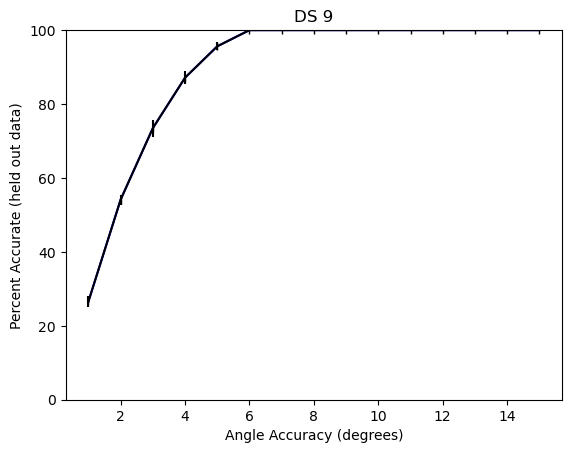

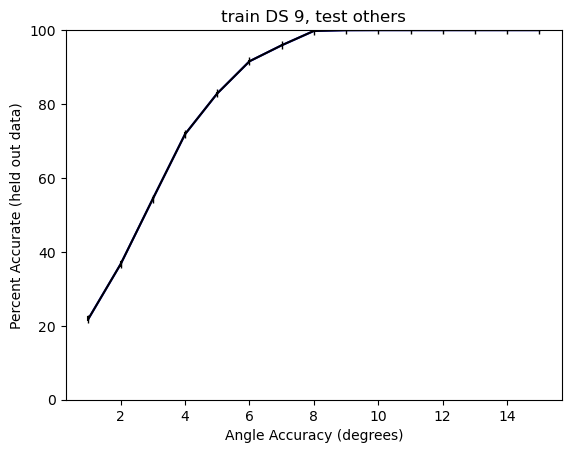

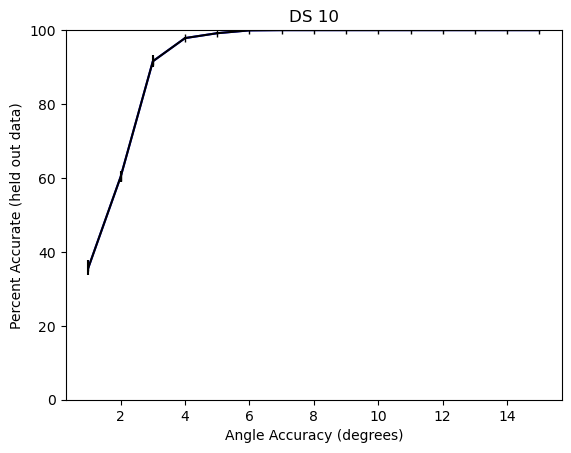

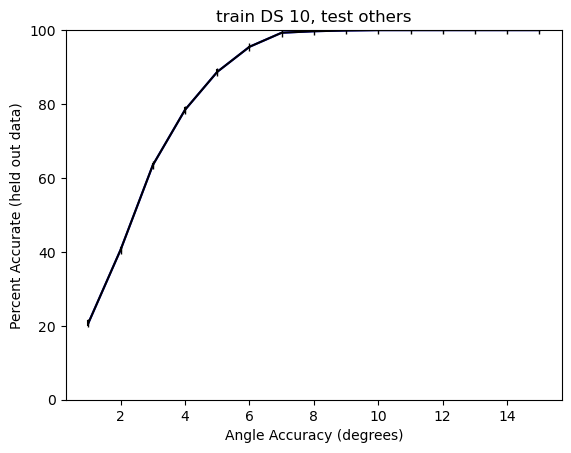

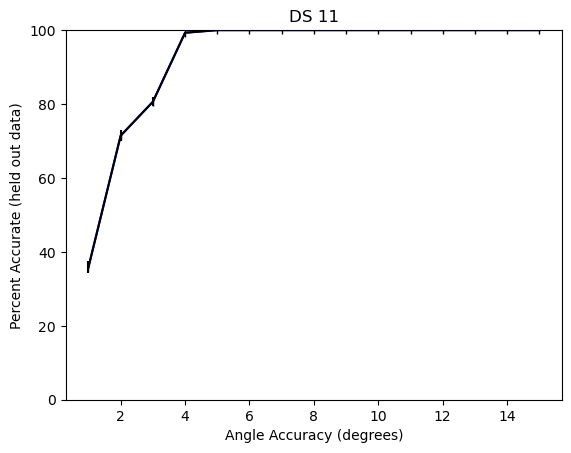

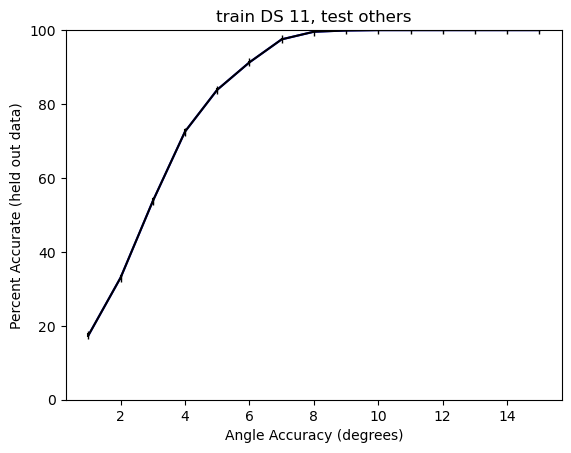

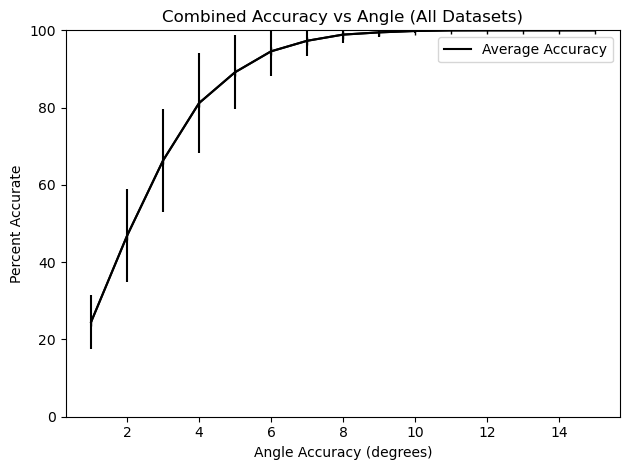

In [6]:
# Initialize an instance of the class for combined accuracy tracking
combined_bender = bender_class()

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    # Train on one dataset
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    g.plot_accuracy(title=f'DS {i_d}')

    # Add accuracy from training phase to the combined class's attribute
    combined_bender.all_accuracies.append(g.accuracy)

    # Test on all other datasets
    ixs = list(range(len(DS_all)))
    ixs.remove(i_d)

    # Load and normalize the other datasets dynamically
    combined_data = []
    for ix in ixs:
        temp_g = bender_class()
        temp_g.load_data(DS_all[ix])
        temp_g.normalize_adc_bw_01()
        combined_data.append(temp_g.data)

    # Combine all test datasets into one DataFrame
    df_combined = pd.concat(combined_data, ignore_index=True)

    # Evaluate the model on the combined dataset
    acc = []
    for _ in range(10):  # Repeat testing 10 times for variability
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack(acc)

    # Add accuracy from testing phase to the combined class's attribute
    combined_bender.all_accuracies.append(acc)

    # Plot accuracy for the combined testing
    g.plot_accuracy(title=f'train DS {i_d}, test others', accuracy=acc)
    

# Plot combined accuracy across all datasets
combined_bender.plot_combined_accuracy(title='Combined Accuracy vs Angle (All Datasets)')
